# Heart Diease 

# Data Description 

It's a clarification of data.
for better understanding  of some of the column headers . Here's what they mean :

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes) 

in output of describe function show the summary statistics of dataset .

## Importing the libraries

In [28]:
# Basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Models from scikit lean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier

## Importing the dataset

In [6]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
print("shape of dataset : " ,dataset.shape)

shape of dataset :  (303, 14)


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Taking care of missing data

In [6]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

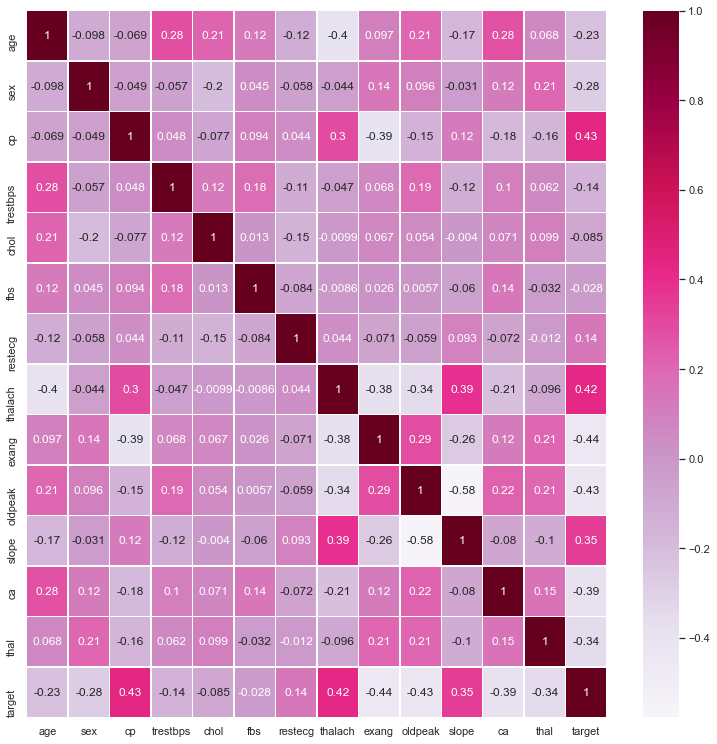

In [7]:
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax , cmap="PuRd")

# Target Analysis

In [8]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
c=['#ee6aa7', 'lightblue']

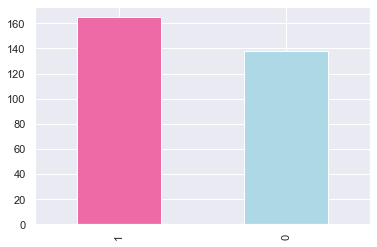

In [10]:
dataset['target'].value_counts().plot(kind='bar', color=c);

<AxesSubplot:ylabel='target'>

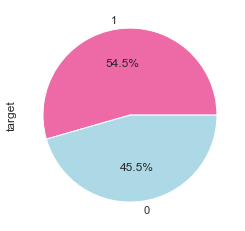

In [11]:
dataset['target'].value_counts().plot.pie(shadow=False,autopct='%1.1f%%', colors = c)

In [12]:
target = dataset.iloc[:, -1].values
print(target)
target.dtype

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


dtype('int64')

# Feature Analysis 

# 1.Categorical Data

In [13]:
f=['#ee6aa7', 'lightblue','#8b3a62', '#cd6090']

In [14]:
c_col = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca','thal','fbs','target'] #categorical columns

C:\Users\mstka\anaconda3\envs\nn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mstka\anaconda3\envs\nn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mstka\anaconda3\envs\nn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

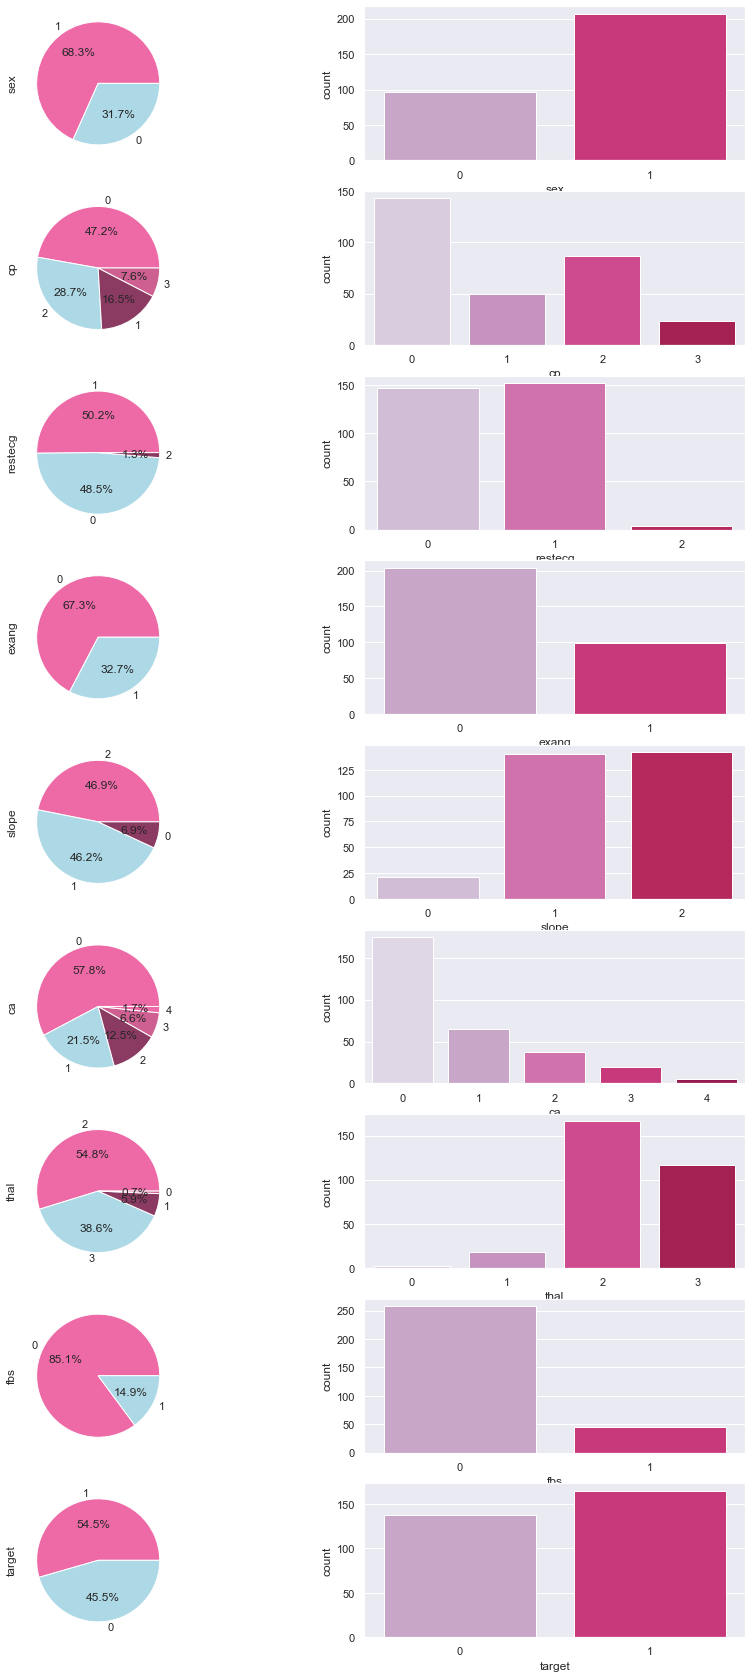

In [16]:
plt.figure(figsize=(15, 30))
i = 1 #counter
for c in c_col:
    plt.subplot(9, 2, i)
    
    dataset[c].value_counts().plot.pie(shadow=False,autopct='%1.1f%%',colors =f)
    i +=1
    plt.subplot(9, 2, i)
    sns.countplot(c, data=dataset,palette="PuRd")
    i+=1

male (68.3%), female (31.7%)
cp - maximum value is 0 (47.2%) i.e. 0 -> 2-> 1 -> 3
restecg - max occurance is 0(50.2%) & 1 (48.5%), 2 (1.3%) is minimal
exang - 67.3% have no and 32.7% are yes
slope - max occurance of 1&2 (46%), 0 is minimal (6.9%)
ca- values from 0 to 4, 0 -> 1 -> 2 -> 3 -> 4
thal - 0,1,2,3 ; 2&3 are max, o is min
fbs - 85.1% = 0 n 14.9%=1
target - 54.5% have heart diesese, 45.5% have none
 محتاجة تتظبط اكتر

# 2. Numircal Data 

In [92]:
n_col = ['age', 'trestbps', 'chol','thalach','oldpeak'] # numirical columns

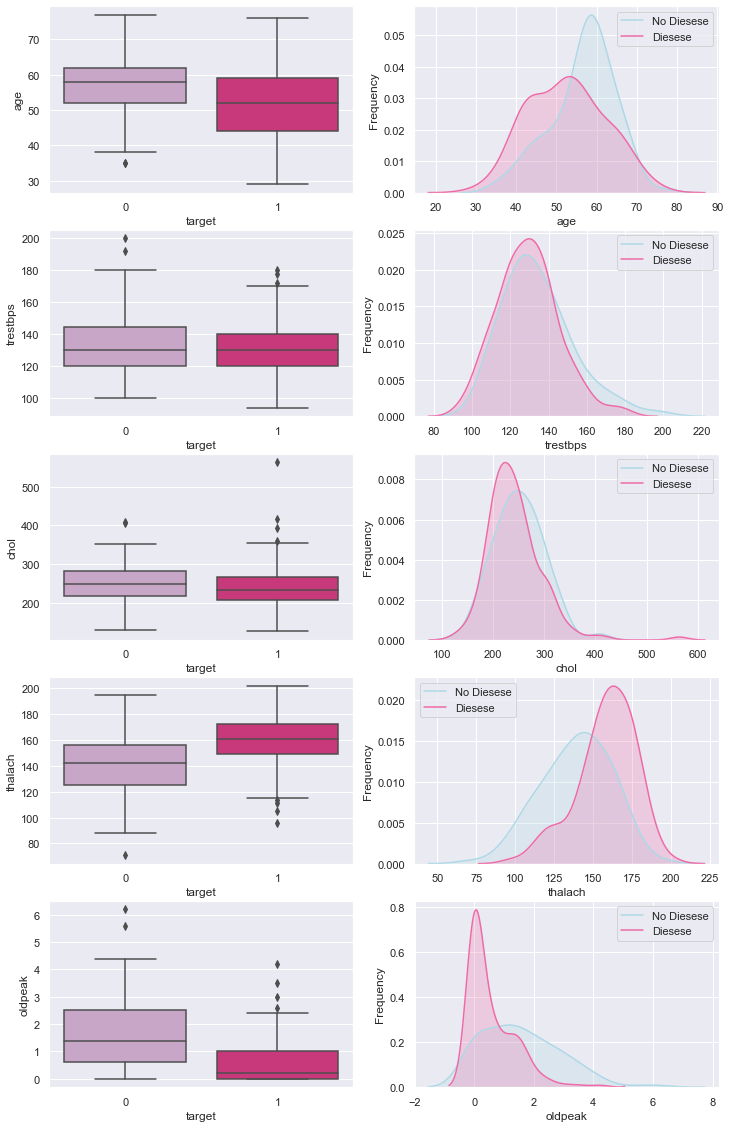

In [107]:
plt.figure(figsize=(12, 24))
i = 1
for c in n_col:
    plt.subplot(6, 2, i)
    sns.boxplot(x='target', y= c, data= dataset ,palette="PuRd" )
    i +=1
    plt.subplot(6, 2, i)
    
    g = sns.kdeplot(dataset[c][(dataset["target"] == 0) & (dataset[c].notnull())], color="lightblue", shade = True)
    g = sns.kdeplot(dataset[c][(dataset["target"] == 1) & (dataset[c].notnull())], ax =g, color="#ee6aa7", shade= True)
    g.set_xlabel(c)
    g.set_ylabel("Frequency")
    g = g.legend(["No Diesese","Diesese"])
    i+=1

age - young people (25-30) have higher chance than older people
For People having heart diesese - max distribution lies between (45-59) Vs not having heart diesese (51-62)
trestbps - people with value 190-220 & (80-85) have no heart diesese
chol - people with very high chol (530-600) have heart diesese
fbs - Doesn't not have any variance
thalach - people with value (52-85) do not have diesese
max freq of having diesese is between (150-172)
oldpeak - people with value (5-7)& (-1.5 to -1.2) : No diesese
 محتاجة تتظبط بردو

# Features against Target 

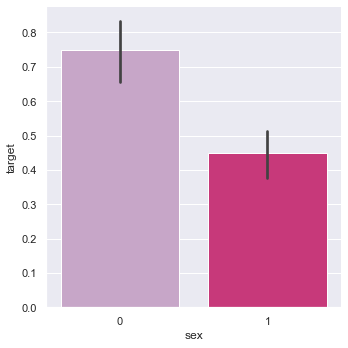

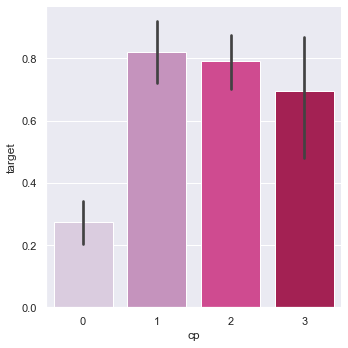

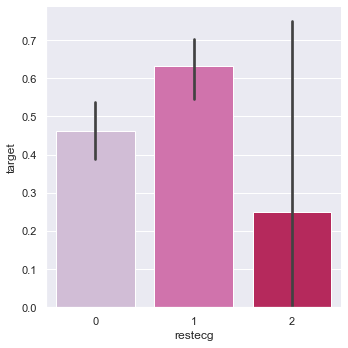

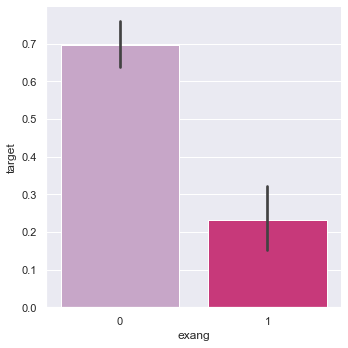

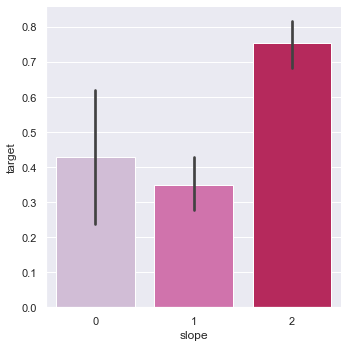

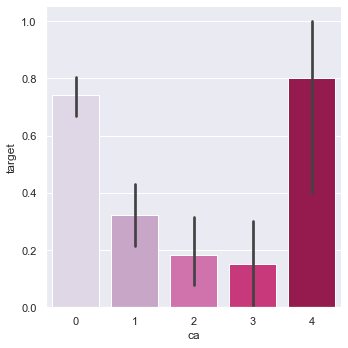

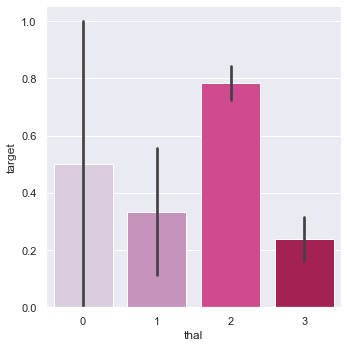

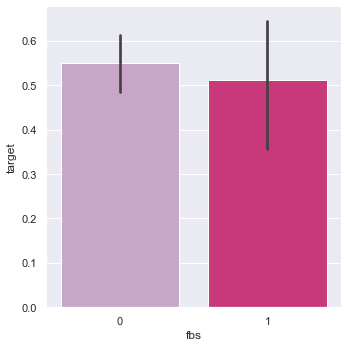

In [118]:
for c in c_col:
    if c!='target':
        sns.catplot(x=c,y='target',kind='bar',data=dataset ,palette="PuRd")

sex - Female have more chance of heart diesese than male
cp - Value 1,2&3 indicate higher chance of heart diesese than 0
restecg - Value 0 & 1 indicate higher chance of diesese than 2.
Value 2 seems to be a outlier
exang - value 0 indicates higher chance of diesese than 1
slope - 2 indiactes higher chances of diesese than 0&1
ca - Value 4&0 have higher chance of diesese than 1,2,3
thal - Value 2 have highest chance and 3 have minimum chance of heart diesese
fbs - fbs=0 have slightly higher chance of heart diesese than fbs=1

  

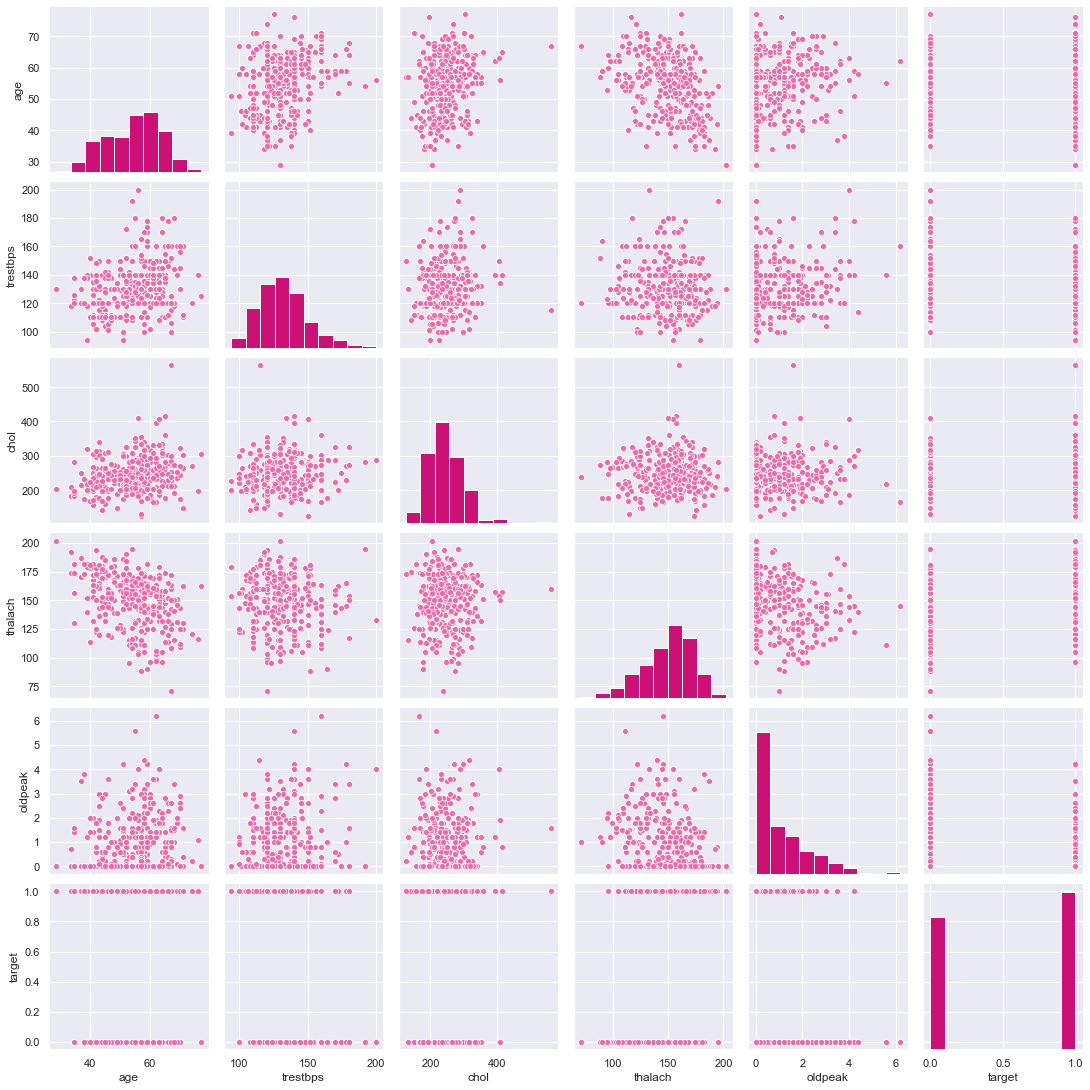

In [30]:
var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
g=sns.pairplot(dataset[var], kind='scatter', diag_kind='hist')
g.map_upper(sns.scatterplot ,color='#ee6aa7')
g.map_lower(sns.scatterplot, color='#ee6aa7')
g.map_diag(plt.hist ,color='#cd1076')
#distribtion of each feature on var list against others 

# 1. Gender analysis

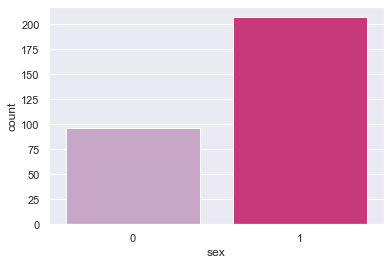

In [117]:
sns.countplot(x = 'sex', data = dataset,palette="PuRd") 

In [5]:
pd.crosstab(dataset['target'], dataset.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

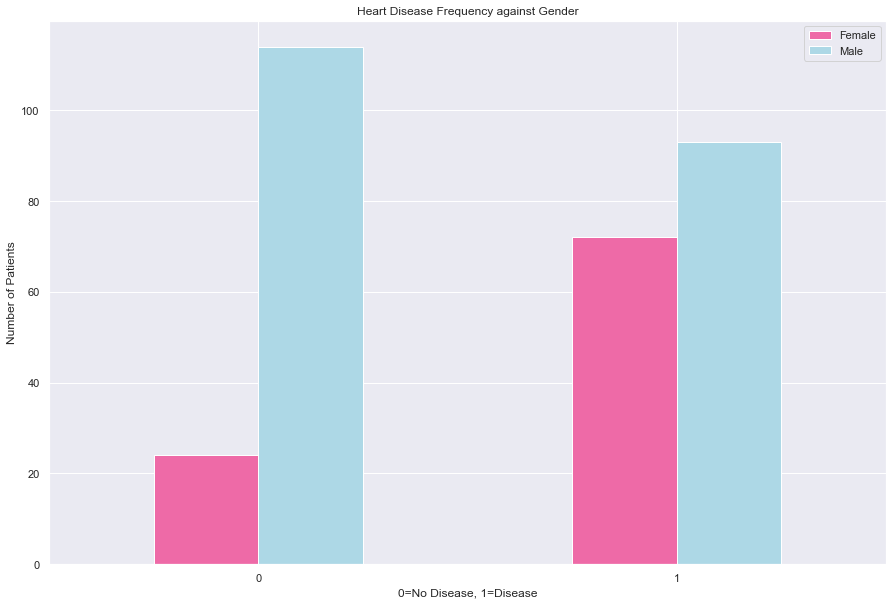

In [6]:
pd.crosstab(dataset['target'], dataset.sex).plot(kind='bar', figsize=(15,10),color=['#ee6aa7', 'lightblue'])
plt.title("Heart Disease Frequency against Gender")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Number of Patients")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

# 2. Age Distribuation

In [32]:
pd.crosstab(dataset.age, dataset.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


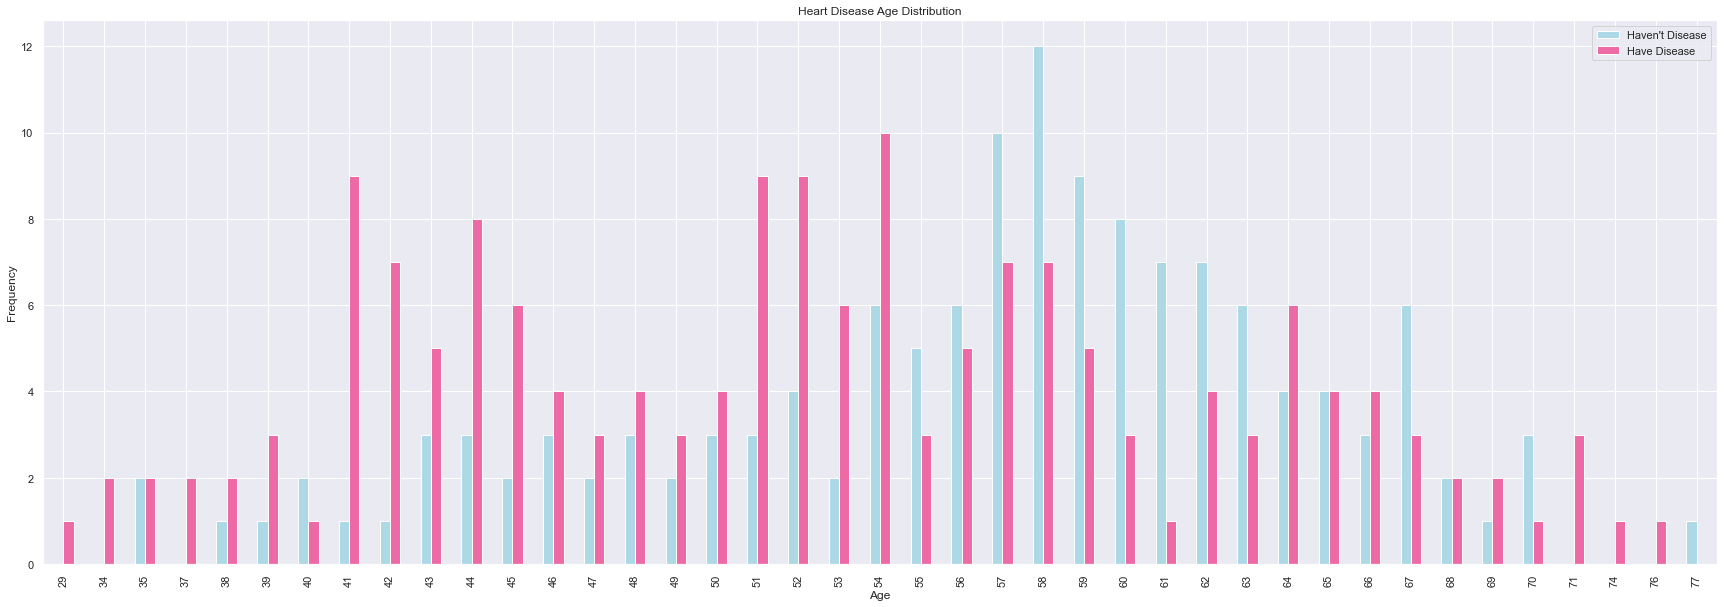

In [11]:
pd.crosstab(dataset.age,dataset.target).plot(kind="bar",figsize=(30,10),color=['lightblue','#ee6aa7' ])
plt.title('Heart Disease Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

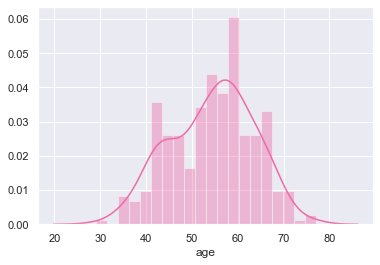

In [122]:
#one more additional plot for age distribuation 
sns.distplot(dataset['age'] , bins = 20 ,color="#ee6aa7")

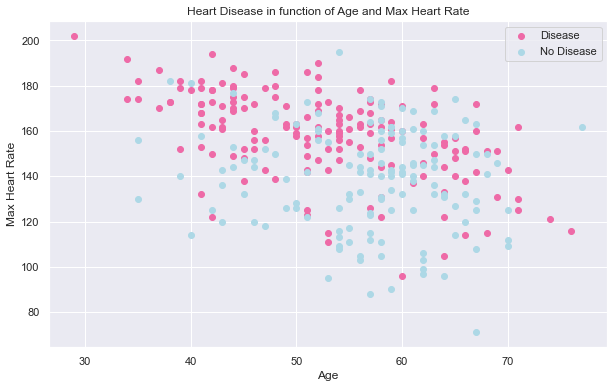

In [12]:
plt.figure(figsize=(10,6))

# Scatter Plot Positive Examples
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1], # max heart beats rate
            c='#lightblue')


# Scatter Plot Negative Examples
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c='#ee6aa7')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease','No Disease']);

# 3. Cheast Pain

In [14]:
pd.crosstab(dataset.cp, dataset.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


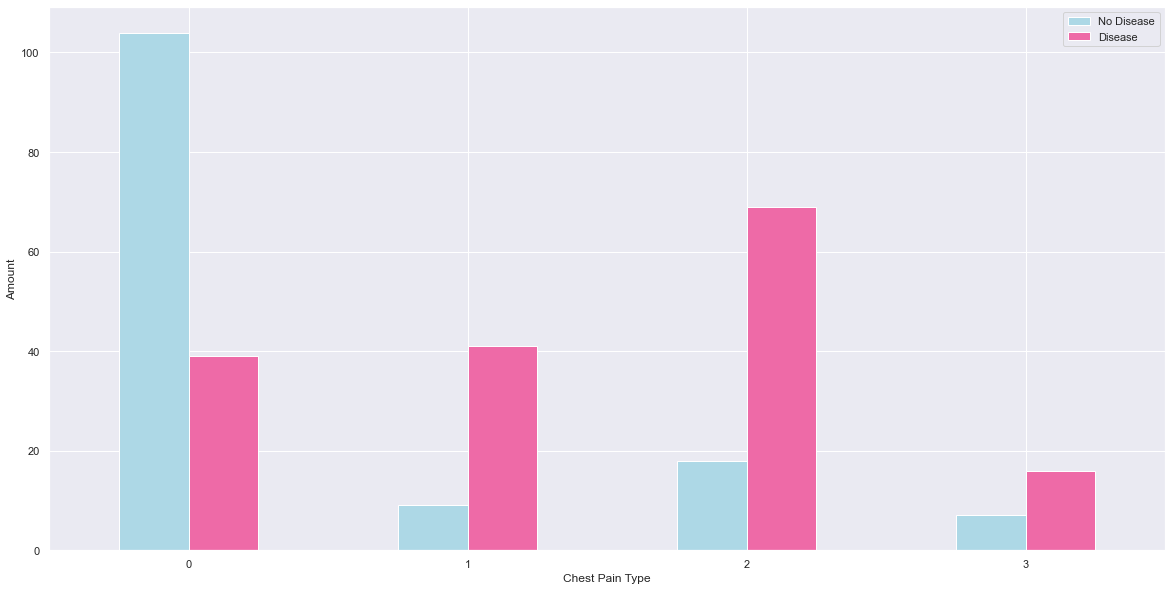

In [12]:
pd.crosstab(dataset.cp, dataset.target).plot(kind='bar',
                                   figsize=(20,10),
                                   color=['lightblue','#ee6aa7'])

plt.title("")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

# Model Preparation

In [7]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [8]:
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [9]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [11]:
print(x_train)

[[62.  1.  1. ...  2.  0.  2.]
 [69.  1.  3. ...  1.  1.  2.]
 [61.  1.  0. ...  2.  1.  3.]
 ...
 [56.  1.  3. ...  1.  0.  3.]
 [47.  1.  2. ...  2.  0.  2.]
 [58.  1.  1. ...  1.  0.  2.]]


In [12]:
print(x_test)

[[70.  1.  0. ...  0.  0.  3.]
 [64.  1.  3. ...  1.  0.  3.]
 [59.  1.  3. ...  1.  0.  3.]
 ...
 [51.  1.  2. ...  1.  0.  2.]
 [67.  1.  0. ...  1.  0.  2.]
 [77.  1.  0. ...  2.  3.  2.]]


In [13]:
print(y_train)

[1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [14]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0]


# KNN Model 

accuracy_score KNN=5 : 0.6703296703296703
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        44
           1       0.67      0.72      0.69        47

    accuracy                           0.67        91
   macro avg       0.67      0.67      0.67        91
weighted avg       0.67      0.67      0.67        91



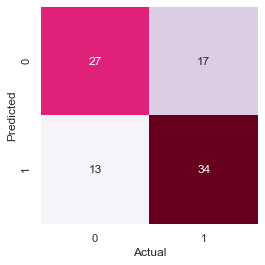

In [41]:
# number of samples for K=5

KNN_classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the values fo X and Y
KNN_classifier.fit(x_train, y_train)

#Predicting the test values with Model
prediction =  KNN_classifier.predict(x_test)

# model evulation
e_knn = confusion_matrix(y_test,prediction) 
var2 = np.unique(prediction)
sns.heatmap(e_knn, square=True, annot=True, cbar=False,xticklabels=var2, yticklabels=var2, cmap="PuRd" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
#calculating the accuracy
accuracy_score =metrics.accuracy_score(y_test,prediction)
print("accuracy_score KNN=5 :",accuracy_score)
print(metrics.classification_report(y_test, prediction))


accuracy_score KNN=8 : 0.7032967032967034
              precision    recall  f1-score   support

           0       0.69      0.70      0.70        44
           1       0.72      0.70      0.71        47

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.70      0.70      0.70        91



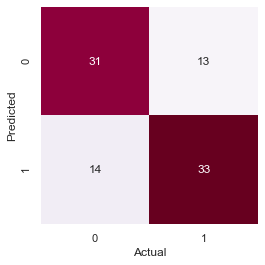

In [42]:
# number of samples for K=8

KNN_classifier = KNeighborsClassifier(n_neighbors=8)

# Fitting the values fo X and Y
KNN_classifier.fit(x_train, y_train)

#Predicting the test values with Model
prediction =  KNN_classifier.predict(x_test)

# model evulation

e2_knn = confusion_matrix(y_test,prediction) 
var3 = np.unique(prediction)
sns.heatmap(e2_knn, square=True, annot=True, cbar=False,xticklabels=var3, yticklabels=var3, cmap="PuRd" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


#calculating the accuracy
accuracy_score =metrics.accuracy_score(y_test,prediction)
print("accuracy_score KNN=8 :",accuracy_score)
print(metrics.classification_report(y_test, prediction))


accuracy_score KNN=8 : 0.7032967032967034
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        44
           1       0.68      0.81      0.74        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



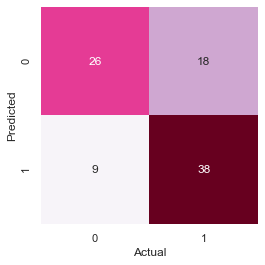

In [43]:
# number of samples for K=8

KNN_classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the values fo X and Y
KNN_classifier.fit(x_train, y_train)

#Predicting the test values with Model
prediction =  KNN_classifier.predict(x_test)

# model evulation

e2_knn = confusion_matrix(y_test,prediction) 
var3 = np.unique(prediction)
sns.heatmap(e2_knn, square=True, annot=True, cbar=False,xticklabels=var3, yticklabels=var3, cmap="PuRd" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


#calculating the accuracy
accuracy_score =metrics.accuracy_score(y_test,prediction)
print("accuracy_score KNN=8 :",accuracy_score)
print(metrics.classification_report(y_test, prediction))


# Descion tree

In [38]:
tree = DecisionTreeClassifier()  #criterion="entropy", max_depth=3
tree = tree.fit(x_train, y_train)   #.fit(X_train, y_train)
prediction = clf.predict(x_test)

accuracy_score tree : 0.7032967032967034
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        44
           1       0.68      0.81      0.74        47

    accuracy                           0.70        91
   macro avg       0.71      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91



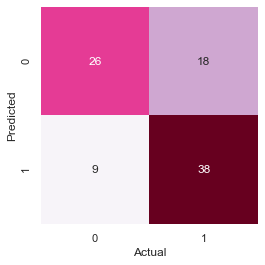

In [44]:
e_tree = confusion_matrix(y_test,prediction) 
var3 = np.unique(prediction)
sns.heatmap(e_tree, square=True, annot=True, cbar=False,xticklabels=var3, yticklabels=var3, cmap="PuRd" ,fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


#calculating the accuracy
accuracy_score =metrics.accuracy_score(y_test,prediction)
print("accuracy_score tree :",accuracy_score)
print(metrics.classification_report(y_test, prediction))


In [36]:
#Visualize 
plt.figure(figsize=(25,10))
a = plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True, rounded=True, fontsize=14)

NameError: name 'plot_tree' is not defined

<Figure size 1800x720 with 0 Axes>

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [64]:
data = pd.read_csv("heart.csv")

In [65]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
X = data.loc[:,data.columns!='target']
y = data.iloc[:,-1]

In [67]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
feature_columns = []

# numeric cols
for header in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']:
  feature_columns.append(tf.feature_column.numeric_column(header))

# bucketized cols
age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# indicator cols
data["thal"] = data["thal"].apply(str)
thal = tf.feature_column.categorical_column_with_vocabulary_list(
      'thal', ['3', '6', '7'])
thal_one_hot = tf.feature_column.indicator_column(thal)
feature_columns.append(thal_one_hot)

data["sex"] = data["sex"].apply(str)
sex = tf.feature_column.categorical_column_with_vocabulary_list(
      'sex', ['0', '1'])
sex_one_hot = tf.feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

data["cp"] = data["cp"].apply(str)
cp = tf.feature_column.categorical_column_with_vocabulary_list(
      'cp', ['0', '1', '2', '3'])
cp_one_hot = tf.feature_column.indicator_column(cp)
feature_columns.append(cp_one_hot)

data["slope"] = data["slope"].apply(str)
slope = tf.feature_column.categorical_column_with_vocabulary_list(
      'slope', ['0', '1', '2'])
slope_one_hot = tf.feature_column.indicator_column(slope)
feature_columns.append(slope_one_hot)


# embedding cols
thal_embedding = tf.feature_column.embedding_column(thal, dimension=8)
feature_columns.append(thal_embedding)

# crossed cols
age_thal_crossed = tf.feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
age_thal_crossed = tf.feature_column.indicator_column(age_thal_crossed)
feature_columns.append(age_thal_crossed)

cp_slope_crossed = tf.feature_column.crossed_column([cp, slope], hash_bucket_size=1000)
cp_slope_crossed = tf.feature_column.indicator_column(cp_slope_crossed)
feature_columns.append(cp_slope_crossed)

In [69]:
def create_dataset(dataframe, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels)) \
          .shuffle(buffer_size=len(dataframe)) \
          .batch(batch_size)

In [70]:
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [71]:
train_ds = create_dataset(train)
test_ds = create_dataset(test)

In [72]:
model = tf.keras.models.Sequential([
  tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/8 [==>...........................] - ETA: 9s - loss: 2.0012 - accuracy: 0.4062WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'age': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=int64>, 'sex': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=string>, 'cp': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=string>, 'trestbps': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int64>, 'chol': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=int64>, 'fbs': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int64>, 'restecg': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int64>, 'thalach': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=int64>, 'exang': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int64>, 'oldpeak': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64

In [74]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8852


[0.3841685950756073, 0.8852459192276001]

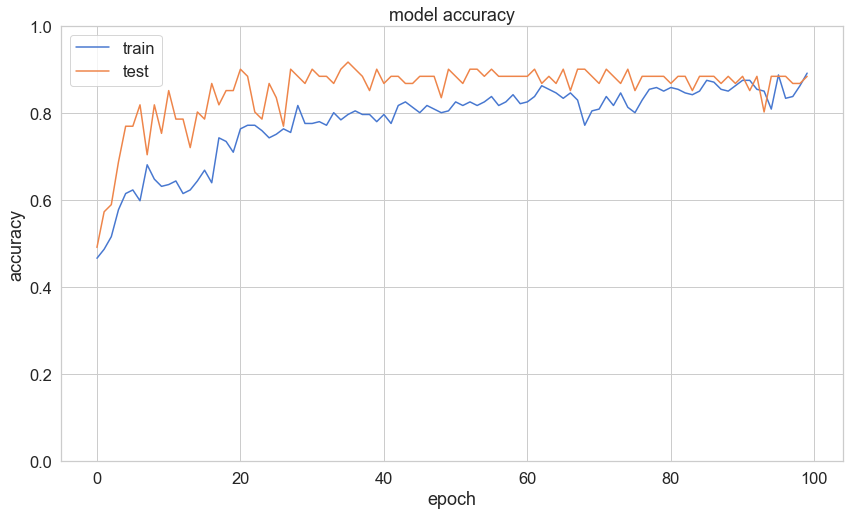

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

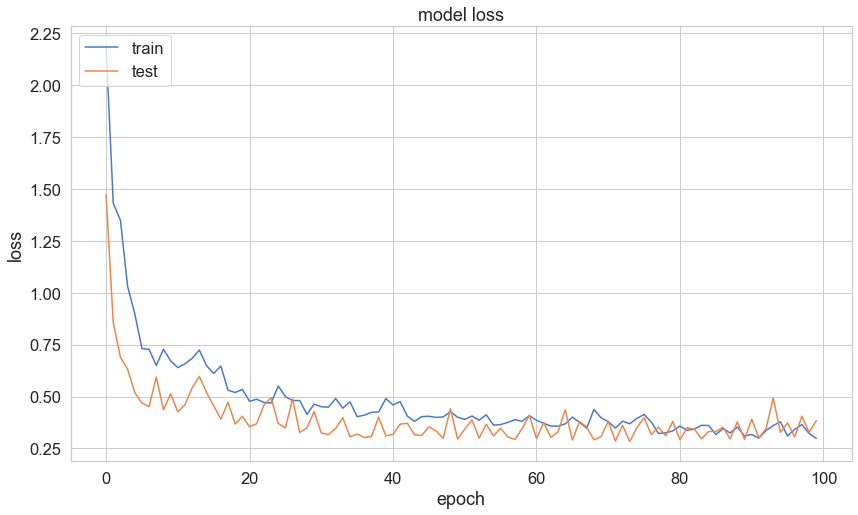

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()